In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont, ImageOps

In [2]:
def trim(image):
    indices = np.where(np.all(np.array(image) != 0, axis=-1))
    maxis = np.max(indices,1)
    minis = np.min(indices,1)
    cropped_letter = Image.fromarray(np.array(image)[minis[0]:maxis[0]+1,minis[1]:maxis[1]+1])
    return cropped_letter

In [3]:
import string

In [4]:
from IPython.display import display
fnt=ImageFont.truetype('../demo/SoukouMincho.ttf',200,encoding = 'whatever')

a


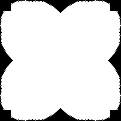

b


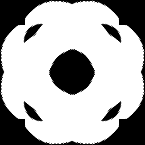

c


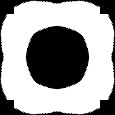

d


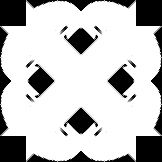

e


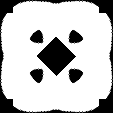

f


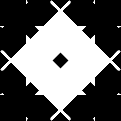

g


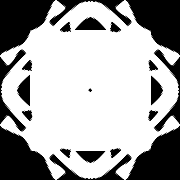

h


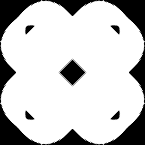

i


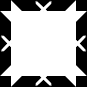

j


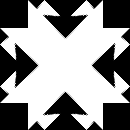

k


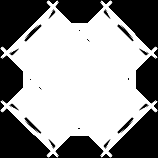

l


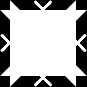

m


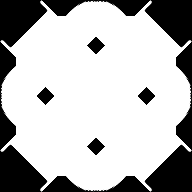

n


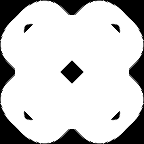

o


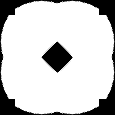

p


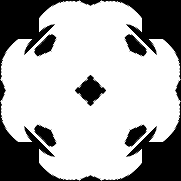

q


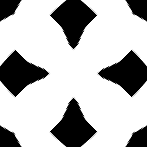

r


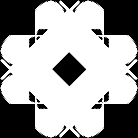

s


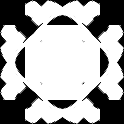

t


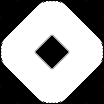

u


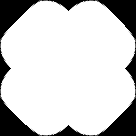

v


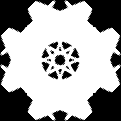

w


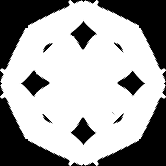

x


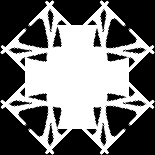

y


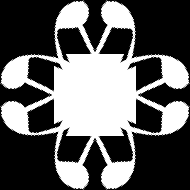

z


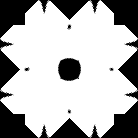

A


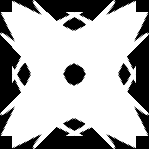

B


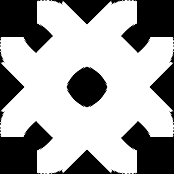

C


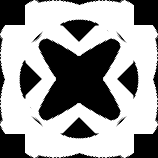

D


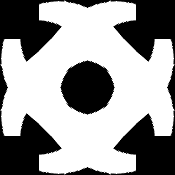

E


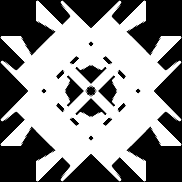

F


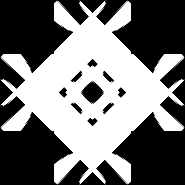

G


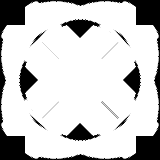

H


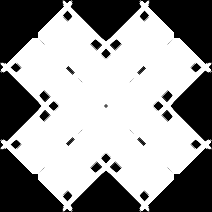

I


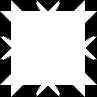

J


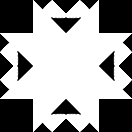

K


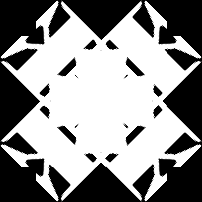

L


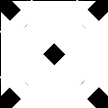

M


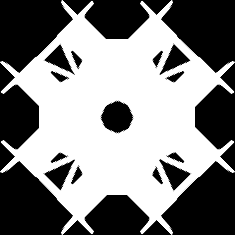

N


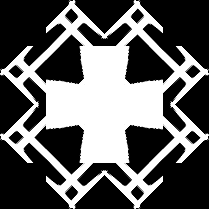

O


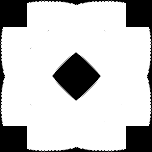

P


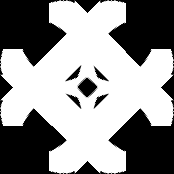

Q


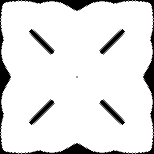

R


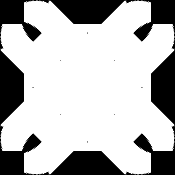

S


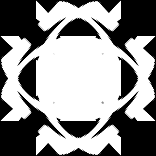

T


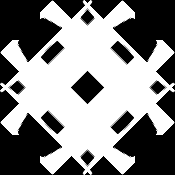

U


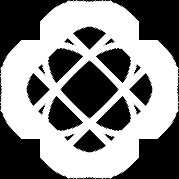

V


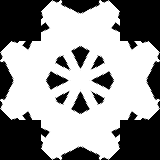

W


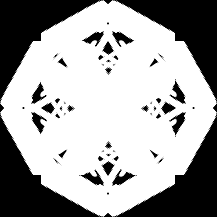

X


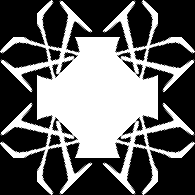

Y


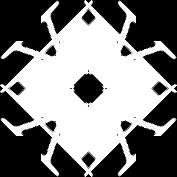

Z


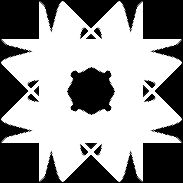

0


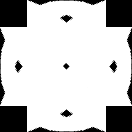

1


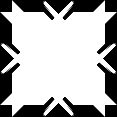

2


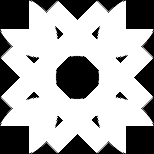

3


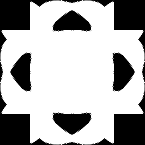

4


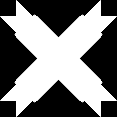

5


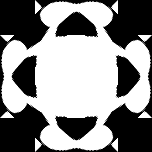

6


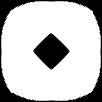

7


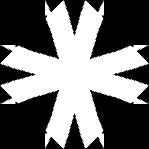

8


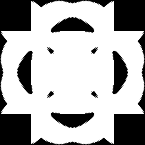

9


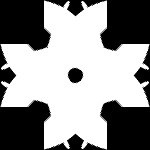

In [5]:
snow_dict = dict({})
for letra in string.ascii_letters+string.digits:
    base_letter = Image.fromarray(np.zeros((500,500,4)).astype('uint8'))
    ImageDraw.Draw(base_letter).text((0,0),letra,(255,255,255), font = fnt)
    mirror_base_letter = ImageOps.mirror(base_letter)

    flips = [45,135,225,315]
    flipped_ims = []

    for letter in [base_letter,mirror_base_letter]:
        for angle in flips:

            rotated_letter = letter.rotate(angle)
            cropped_letter = trim(rotated_letter)
            flipped_ims.append(cropped_letter)

    canvas = Image.fromarray(np.zeros((900,900,3)).astype('uint8'))

    dims = np.array(flipped_ims[0]).shape[:2]

    for image in flipped_ims:
        dims = image.size
        canvas.paste(image,(0+int(dims[1]/2),0+int(dims[0]/2)),image)
    canvas = trim(canvas)
    print(letra)
    snow_dict[letra]=canvas
    display(canvas)

In [6]:
word = 'Thisisjustasample'
snow_word = []
for letter in word:
    color = np.hstack((np.random.randint(255,size=3),np.array([127])))
    imgi = snow_dict[letter]

    imgi = imgi.convert('RGBA')
    pixels = imgi.load()
    for i in range(imgi.size[0]): # for every pixel:
        for j in range(imgi.size[1]):
            if pixels[i,j] == (0, 0, 0, 255):
                pixels[i,j] = (0, 0, 0, 0)
                
            else :
                pixels[i,j] = tuple(color)
    snow_word.append(imgi.convert('RGBA'))
    
canvas = Image.fromarray(np.zeros((900,900,3)).astype('uint8'))
for img in snow_word:
    img_w, img_h = img.size
    bg_w, bg_h = canvas.size
    offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)
    canvas.paste(img, offset, img)

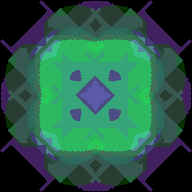

In [7]:
trim(canvas)